# The Lorenz Differential Equations

Before we start, we import some preliminary libraries. They will be used for HTTP requests and plot of graphs.

In [1]:
import requests as rq
import json as js
from pprint import pprint

Lets define our paths.

In [2]:
pathBitfinex = "https://api.bitfinex.com"
pathOKEX = "https://www.okex.com"

We will get About 24h of data with a granularity of 60 seconds of the BTC USDT market.

In [7]:
symbol = 'BTC-USDT'
startDate = '2020-07-25T01:31:00.000Z'
endDate = '2020-07-24T01:55:00.000Z'
granularity = '60'

We define a candlesOKEX function that will allow us to get historical candles of the designated settings.

In [8]:
def candlesOKEX(symbol, granularity, startDate, endDate):
    getUrl = f'{pathOKEX}/api/spot/v3/instruments/{symbol}/history/candles?start={startDate}&end={endDate}&granularity={granularity}'
    raw = js.loads(rq.get(url=getUrl).text) # get method
    return raw # response format [[datetime, o, h, l, c, vol]...]

# This will GET https://www.okex.com/api/spot/v3/instruments/BTC-USDT/history/candles?start=2020-07-25T02:31:00.000Z&end=2020-07-24T02:55:00.000Z&granularity=60
_candlesOKEX = candlesOKEX(symbol ,granularity ,startDate, endDate)

Let's proceed the same way with the BitFinex API.

In [9]:
symbolBitfinex = 'tBTCUSD'
endDateBitfinex = '1595640660000'
startDateBitfinex = '1595555700000'
granularityBitfinex = '1m'

def candlesBitfinex(symbol, granularity, startDate, endDate):
    getUrl = f'{pathBitfinex}/v2/candles/trade:{granularity}:{symbol}/hist' # str timeframe in ['1m', '5m', '15m', '30m', '1h', '3h', '6h', '12h', '1D', '7D', '14D', '1M']
    params = {
        'limit': 300, #always max
        'sort': 0, # desc
        'start': startDate,
        'end': endDate
    }
    raw = js.loads(rq.get(url=getUrl,params=params).text) # get method
    return raw # response format [[datetime, o, h, l, c, vol]...]

# This will GET https://www.okex.com/api/spot/v3/instruments/BTC-USDT/history/candles?start=2020-07-25T02:31:00.000Z&end=2020-07-24T02:55:00.000Z&granularity=60
_candlesBtfx = candlesBitfinex(symbolBitfinex ,granularityBitfinex ,startDateBitfinex, endDateBitfinex)

Plot both results and maybe notice some opportunities!

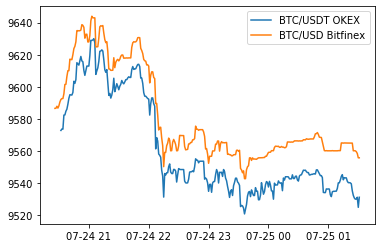

In [10]:
import matplotlib.pyplot as plt
import dateutil.parser
from datetime import datetime

ts = [dateutil.parser.parse(cd[0]) for cd in _candlesOKEX]
candles = [float(cd[1]) for cd in _candlesOKEX]
ts2 = [datetime.fromtimestamp(cd[0] / 1000) for cd in _candlesBtfx]
candles2 = [cd[1] for cd in _candlesBtfx]
plt.plot(ts, candles, label='BTC/USDT OKEX') # plot price chart for OKEX BTC USDT
plt.plot(ts2, candles2, label='BTC/USD Bitfinex') # plot price chart
plt.legend()
plt.show()
